https://www.kaggle.com/datasets/iamsouravbanerjee/airline-dataset  
Data Visualize Practice

In [2]:
import os 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
os.chdir('archive')

In [8]:
air = pd.read_csv(os.listdir()[-1])

In [10]:
air.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [11]:
air.columns #'Passenger ID', 'First Name', 'Last Name', 'Departure Date', Airport Continent 필요 없는거

Index(['Passenger ID', 'First Name', 'Last Name', 'Gender', 'Age',
       'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name',
       'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport',
       'Pilot Name', 'Flight Status'],
      dtype='object')

In [12]:
air_copy = air.copy()

In [48]:
air_copy.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [15]:
air = air[air.columns[3:]]

In [64]:
gender = air['Gender'].value_counts()

<Axes: xlabel='Gender'>

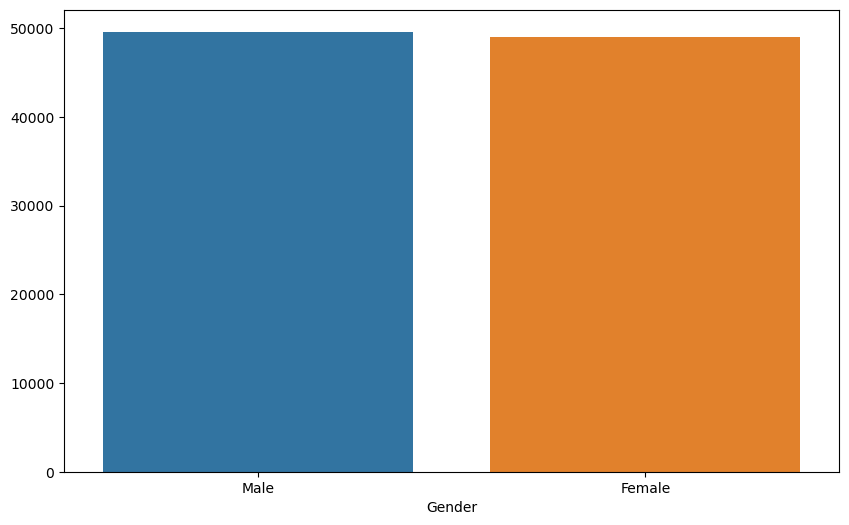

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(x = gender.index,
            y = gender.values)

In [67]:
gender_average = air.groupby(['Gender'])['Age'].mean()

In [68]:
gender_average

Gender
Female    45.51943
Male      45.48879
Name: Age, dtype: float64

In [71]:
air.head()

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [82]:
gender_flight = air.groupby(['Gender', 'Flight Status'])['Age'].count()

In [84]:
gender_flight = gender_flight.reset_index()

In [85]:
gender_flight

,Gender,Flight Status,Age
0,Female,Cancelled,16452
1,Female,Delayed,16291
2,Female,On Time,16278
3,Male,Cancelled,16490
4,Male,Delayed,16540
5,Male,On Time,16568


<Figure size 1200x800 with 0 Axes>

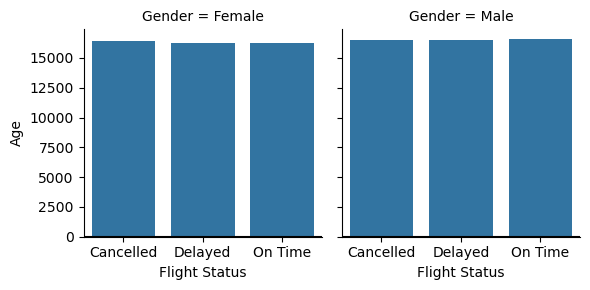

In [98]:
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(data = gender_flight, col='Gender', sharex = True, sharey = True)
g.map_dataframe(sns.barplot, x='Flight Status', y='Age')
g.map(plt.axhline, y=0, color='black') ## horizontal line
plt.tight_layout()
plt.show() 

In [93]:
flight = air['Flight Status'].value_counts().reset_index()

In [95]:
flight

,Flight Status,count
0,Cancelled,32942
1,On Time,32846
2,Delayed,32831


<Axes: xlabel='Flight Status', ylabel='count'>

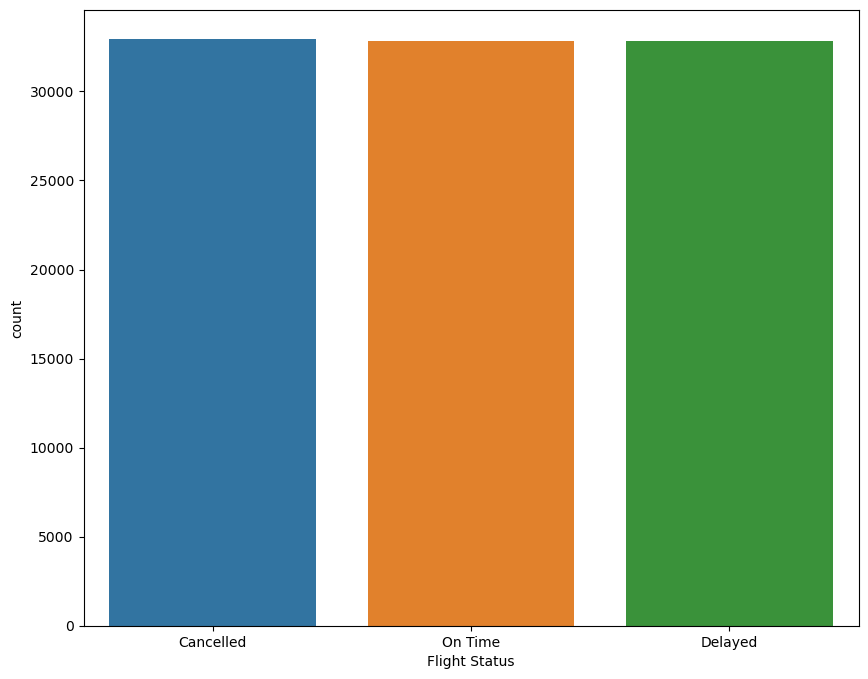

In [97]:
plt.figure(figsize=(10,8))
sns.barplot(data=flight, x='Flight Status', y='count')

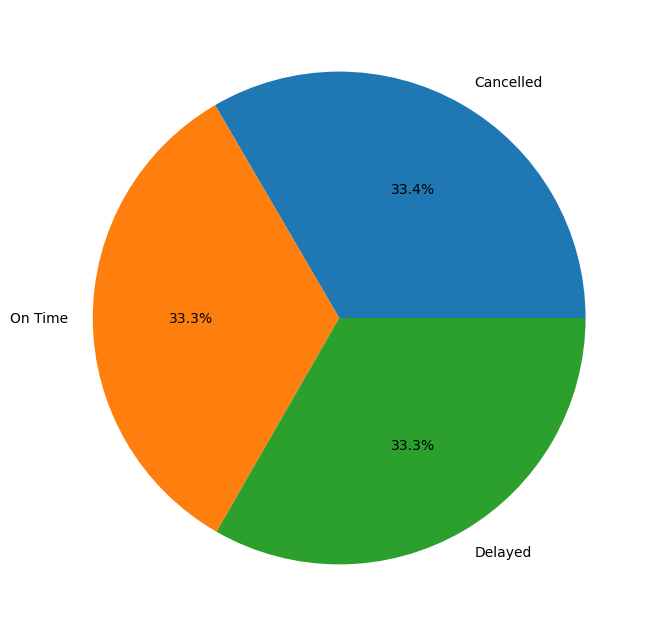

In [135]:
plt.figure(figsize=(10,8))
plt.pie(flight['count'], labels=flight['Flight Status'].unique(), autopct = '%1.1f%%')
plt.show()

In [117]:
nation = air['Nationality'].value_counts()

In [123]:
nation = nation.sort_values(ascending=False)[:15]

In [124]:
nation

Nationality
China             18317
Indonesia         10559
Russia             5693
Philippines        5239
Brazil             3791
Portugal           3299
Poland             3245
France             2907
Sweden             2397
United States      2105
Japan              1805
Czech Republic     1690
Ukraine            1591
Peru               1540
Thailand           1426
Name: count, dtype: int64

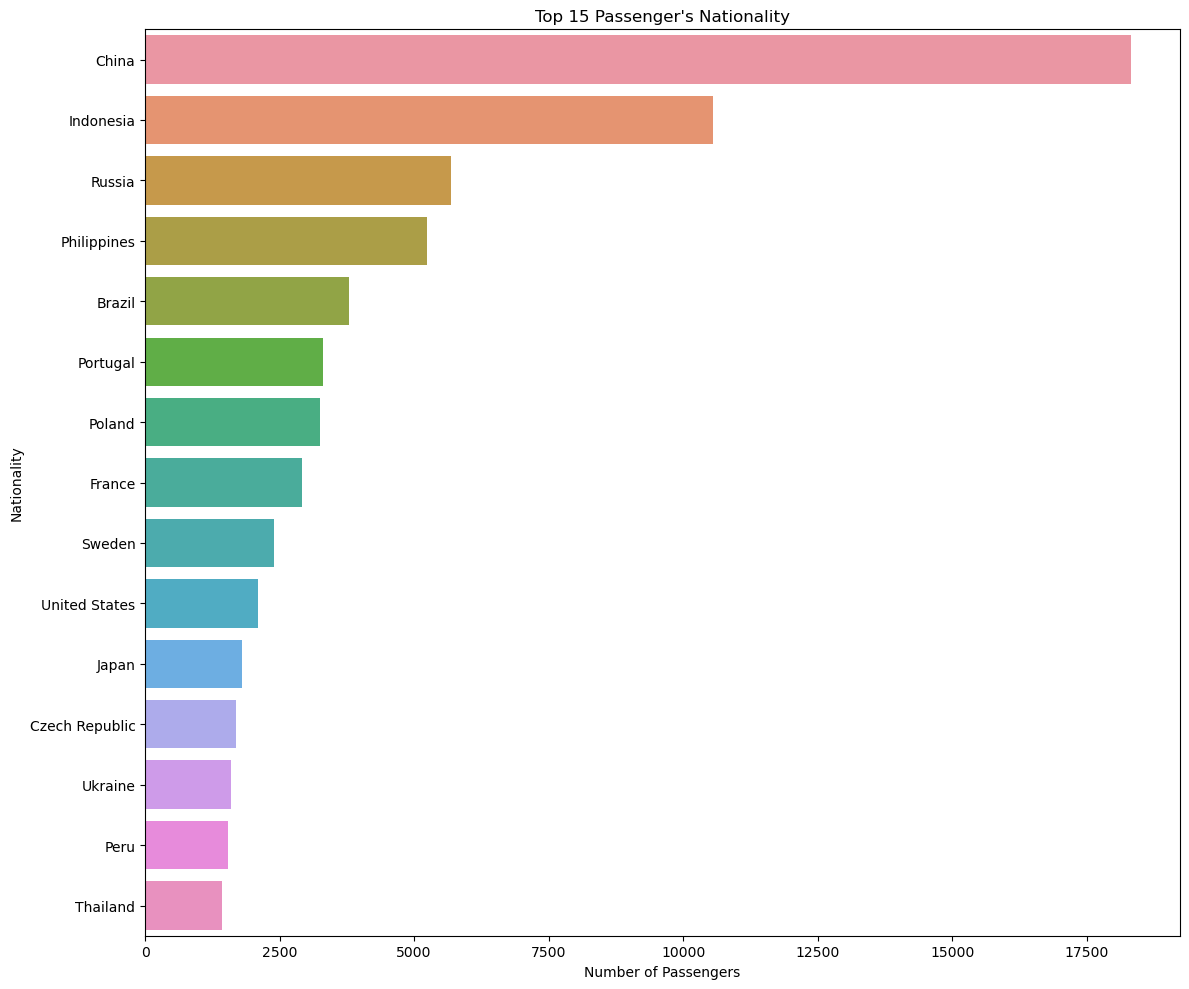

In [129]:
plt.figure(figsize=(12, 10))
sns.barplot(x=nation.values, y=nation.index)
plt.xlabel('Number of Passengers')
plt.title("Top 15 Passenger's Nationality")
plt.tight_layout()

In [142]:
continents = air['Continents'].value_counts().reset_index()

Text(0.5, 1.0, 'Sum of airport by continents')

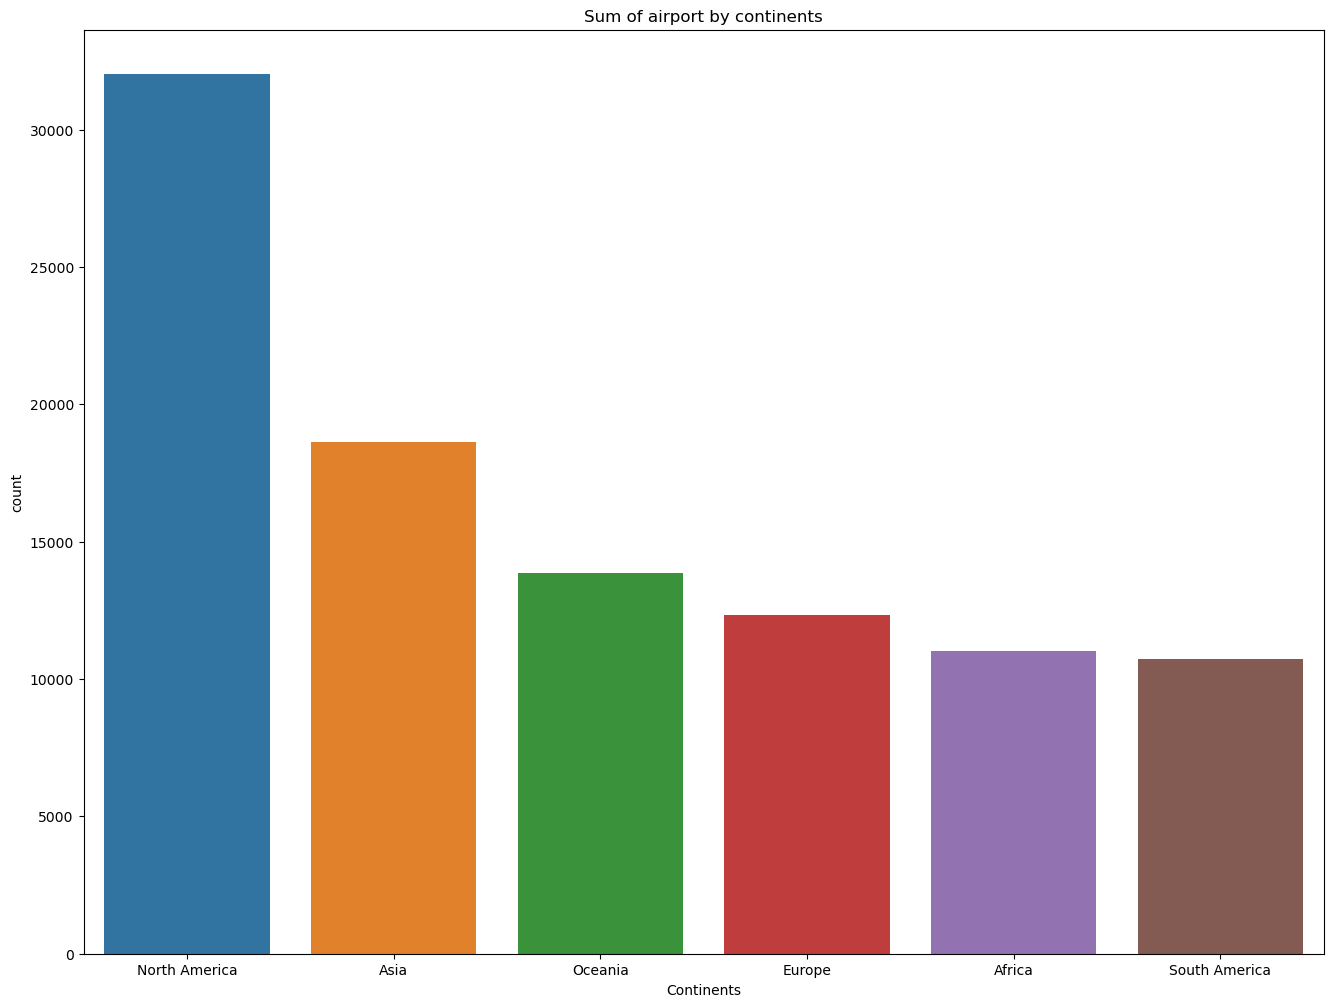

In [145]:
plt.figure(figsize=(16,12))
sns.barplot(data=continents, x='Continents', y='count')
plt.title('Sum of Airport by Continents')

In [147]:
bins = [0, 12, 30, 50, 100]
labels = ['Children', 'Youth', 'Adults', 'Seniors']
air['Age Group'] = pd.cut(air['Age'], bins=bins, labels=labels)

/var/folders/ls/909q9ryn4v73_307zh2h7fhc0000gn/T/ipykernel_45151/491004877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air['Age Group'] = pd.cut(air['Age'], bins=bins, labels=labels)


In [155]:
ages = air['Age Group'].value_counts().reset_index()

In [156]:
ages

,Age Group,count
0,Seniors,43831
1,Adults,21858
2,Youth,19883
3,Children,13047


Text(0.5, 1.0, 'Age group in flight')

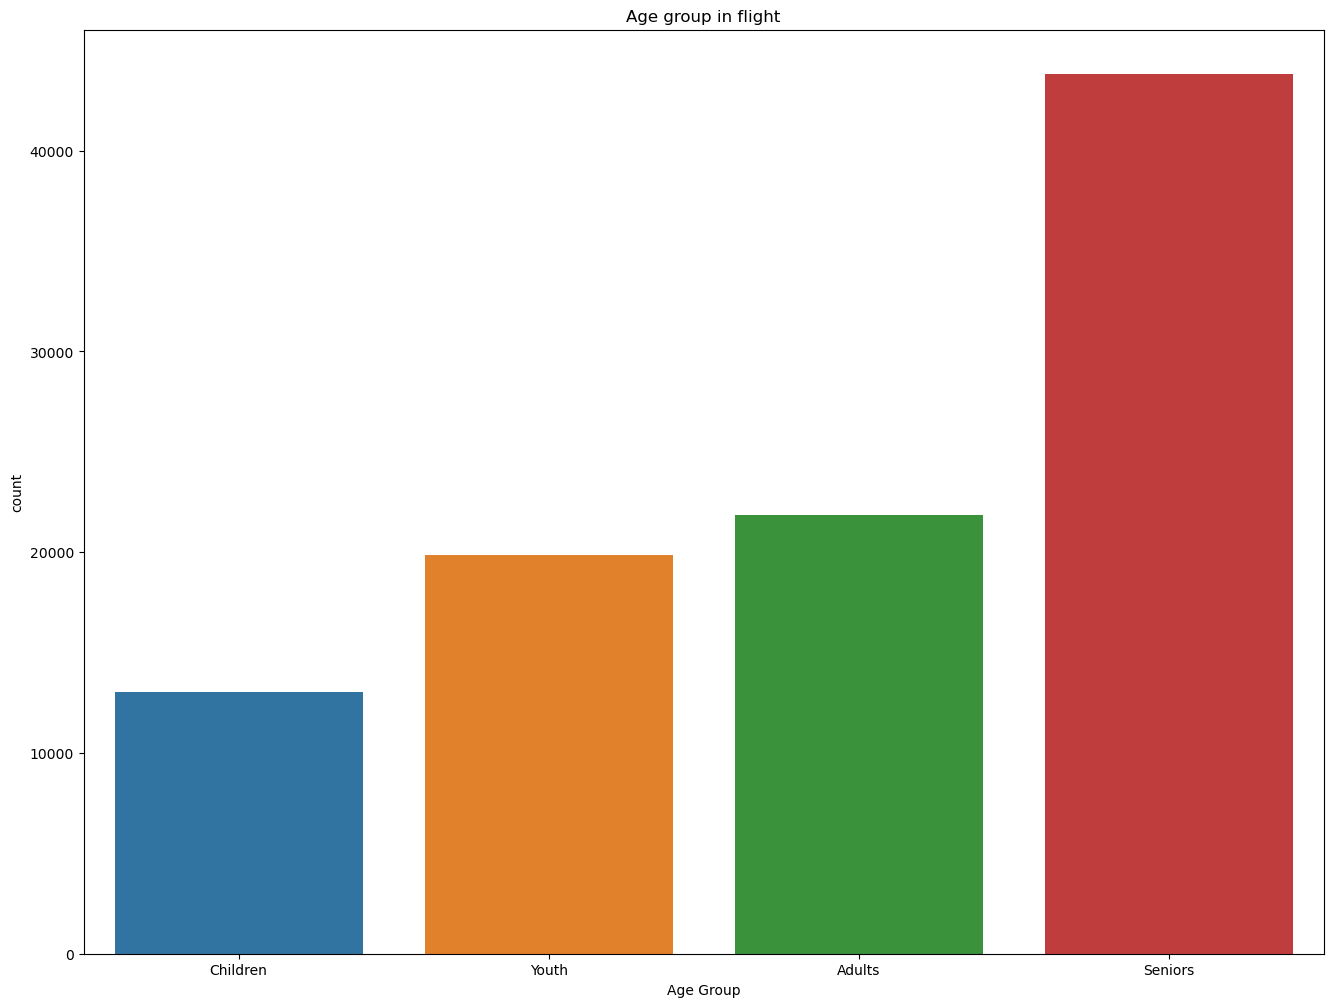

In [157]:
plt.figure(figsize=(16,12))
sns.barplot(data=ages, x='Age Group', y='count')
plt.title('Age group in flight')
## 0-12/13-30/31-51/51-100

In [159]:
## Which continent is the most visited?
continents_visits = air['Continents'].value_counts().reset_index()

Text(0.5, 1.0, 'most visited continents')

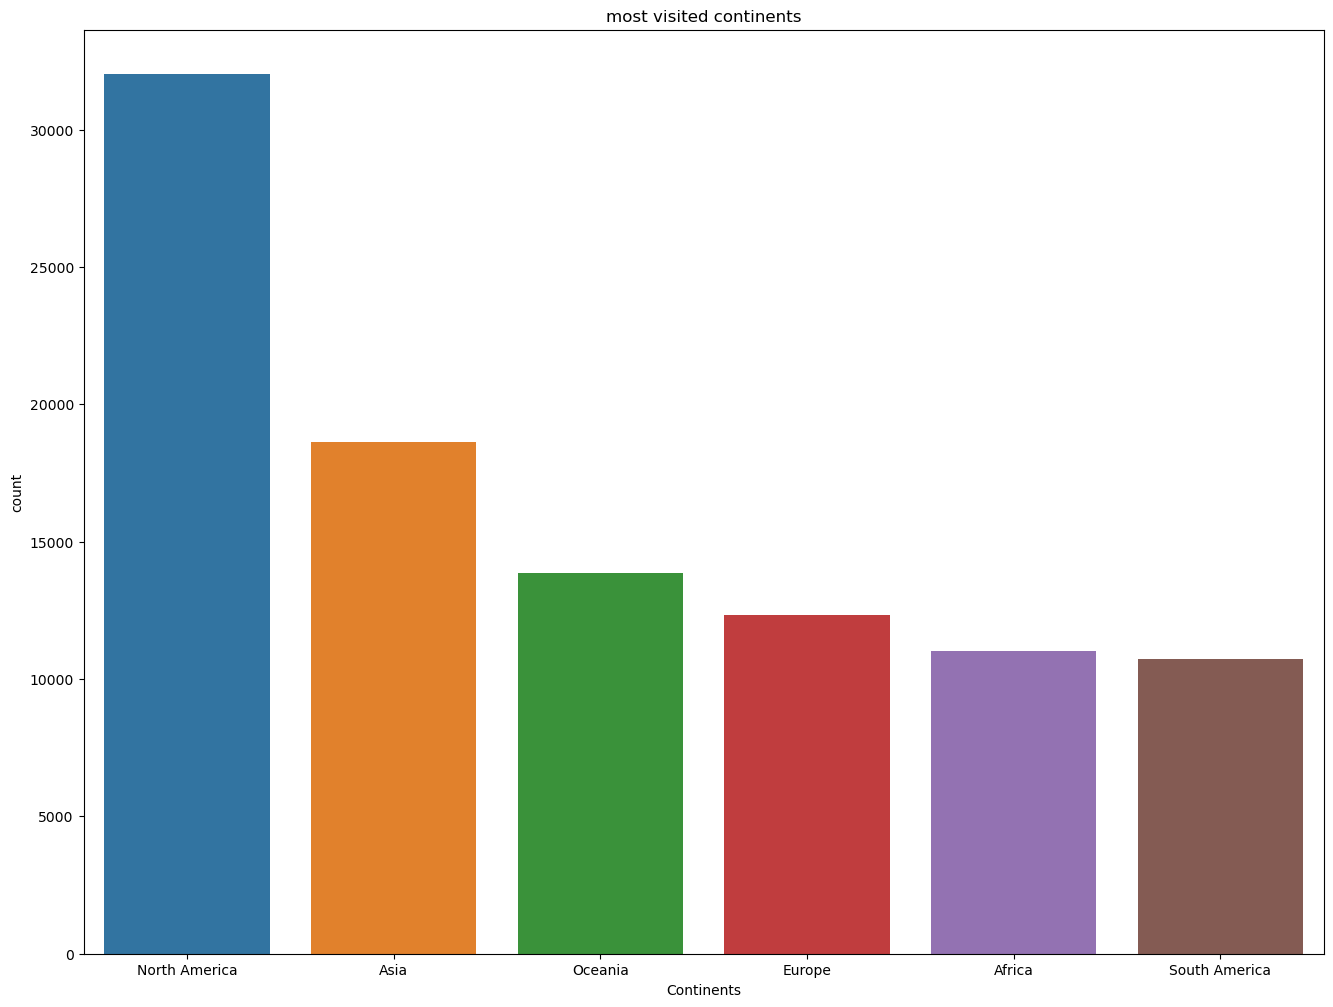

In [161]:
plt.figure(figsize=(16,12))
sns.barplot(data=continents_visits, x='Continents', y='count')
plt.title('most visited continents')